In [15]:
!pip install -r requirments.txt

Import Dependencies

In [16]:
import os
import numpy as np
import pandas as pd
import openai, groq
import seaborn as sns
from enum import Enum
from dotenv import load_dotenv
from pydantic import BaseModel #Get structured data from LLMs

load_dotenv(r"C:\Users\nethm\Desktop\EDA\.env")
api_key = os.getenv("GROQ_API_KEY")
client = groq.Groq(api_key=api_key)

In [17]:
os.getcwd()

'c:\\Users\\nethm\\Desktop\\EDA'

Basic Information

In [18]:
df = pd.read_csv('data/raw/ChurnModelling.csv')
df.head(15)

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Jack,Smith,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Carol,Wilson,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Grace,Wilson,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,Hank,Jones,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,Eva,Wilson,684,France,Male,27.0,2,134603.88,1,1,1,71725.73,0


In [19]:
#get null values
df.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                600
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Handle Missing Values

Deletion

axis = 0 -> check each row and drops whole row if any contains value
axis = 1 -> check each column and drops whole column if any contains value

In [20]:
df_cp = df.copy()
df_cp = df_cp.dropna(axis=0)
df_cp

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Jack,Smith,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Grace,Garcia,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Jack,Garcia,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Carol,Johnson,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Jack,Garcia,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


3.2 Imputation

The possible ways to do this are:

Filling the missing data with the mean or median value if its a numerical variable.

Filling the missing data with mode if its a categorical value.

Filling the numerical value with 0 or -999 or some other number that will not occour in the data. This can be done so machine can decide the data isnt real or is different

Filling categorial value with a new type for the missing values

3.2.1 Age

In [21]:
mean = df['Age'].mean()
median = df['Age'].median()
mean = round(mean,2)

print(f"Mean | Age : {mean}")
print(f"Median | Age : {median}")

Mean | Age : 38.91
Median | Age : 37.0


<Axes: xlabel='Age', ylabel='Count'>

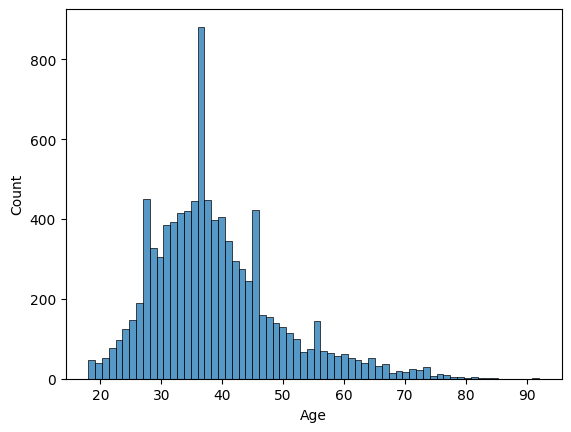

In [22]:
sns.histplot(df['Age'])

In [23]:
df_impute = df.copy()

In [24]:
df_impute.loc[:,'Age'] = df_impute['Age'].fillna(mean)
df_impute.head()

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


3.2.2 Gender

In [25]:

class Gender(str, Enum):
    MALE = "male"
    FEMALE = "Female"

class GenderPrediction(BaseModel):
    firstname: str
    lastname: str
    pred_gender: Gender

def predict_gender(firstname: str, lastname: str):
    prompt = f"""
    What is most likely the gender for someone with firstname '{firstname}' 
    and lastname '{lastname}'?
    Your response must contain only one word: MALE or FEMALE
    """

    response = client.chat.completions.create(
        model="llama-3.3-70b-versatile",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content.strip()




In [26]:
missing_gender_index = df_impute['Gender'].isnull()
for idx in df_impute[missing_gender_index].index:
    first_name = df_impute.loc[idx, 'Firstname']
    last_name = df_impute.loc[idx, 'Lastname']
    gender = predict_gender(first_name, last_name)
    if gender:
        df_impute.loc[idx, 'Gender']=gender
        print(f"{first_name} {last_name}: {gender}")
    else:
        print(f"{first_name} {last_name}: No gender Detected")


Eva Wilson: FEMALE
Ivy Johnson: FEMALE
David Taylor: MALE
Frank Davis: MALE
Jack Wilson: MALE
David Miller: MALE
Eva Taylor: FEMALE
Grace Johnson: FEMALE
Hank Miller: MALE
Frank Williams: MALE
Alice Davis: FEMALE
Alice Brown: FEMALE
Alice Garcia: FEMALE
Bob Jones: MALE
Jack Davis: MALE
Grace Williams: FEMALE
Ivy Jones: FEMALE
David Smith: MALE
David Miller: MALE
Eva Williams: FEMALE
Frank Garcia: MALE
Alice Wilson: FEMALE
Carol Jones: FEMALE
Hank Davis: MALE
Ivy Williams: FEMALE
Hank Smith: MALE
Ivy Jones: FEMALE
Alice Brown: FEMALE
Eva Taylor: FEMALE
Carol Williams: FEMALE
Jack Williams: MALE
Ivy Brown: FEMALE
David Brown: MALE
Bob Smith: MALE
Frank Wilson: MALE
Bob Williams: MALE
Ivy Johnson: FEMALE
Jack Taylor: MALE
David Davis: MALE
David Garcia: MALE
Eva Brown: FEMALE
Frank Wilson: MALE
Jack Davis: MALE
Eva Miller: FEMALE
Grace Williams: FEMALE
Bob Jones: MALE
David Taylor: MALE
Frank Smith: MALE
Ivy Jones: FEMALE
David Williams: MALE
Grace Jones: FEMALE
Grace Miller: FEMALE
Bob T

In [27]:
print(df_impute.columns)

df_impute = df_impute.drop(
    columns=[
        'RowNumber',
        'CustomerId',
        'Firstname',
        'Lastname'
    ]
)

df_impute.head()

Index(['RowNumber', 'CustomerId', 'Firstname', 'Lastname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='str')


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [28]:
df_impute.to_csv('data/processed/ChurnModelling_Missing_values_handled.csv', index='False')